# Initializatoin

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/AI/Deep Learning/DL/HW3/

/content/drive/.shortcut-targets-by-id/1Zna1suVlMaqbr-umhS-czb-knCu-xeVp/AI/Deep Learning/DL/HW3


In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Imports

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torch.nn import Parameter

import sklearn.metrics as metrics

from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# from name_dataset import Dataset

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, you're encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

For the task at hand, you've been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. Your objective is to prognosticate the language of origin for a given name, relying solely on its orthography. Your task primarily involves implementing the section demarcated by `#your_code`.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Error occurred while downloading data.zip: --2024-04-11 07:55:47--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.65.3.63, 18.65.3.37, 18.65.3.38, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.65.3.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

     0K .......... .......... .......... .......... ..........  1% 7.87M 0s
    50K .......... .......... .......... .......... ..........  3% 9.28M 0s
   100K .......... .......... .......... .......... ..........  5% 24.4M 0s
   150K .......... .......... .......... .......... ..........  7% 17.4M 0s
   200K .......... .......... .......... .......... ..........  8% 23.8M 0s
   250K .......... .......... .......... .......... .......... 10% 41.8M 0s
   300K .......... .......... .......... .......... .......... 12% 32.3M 0s
   350K .......... .......... .......... .......... .....

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        #your_code
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):

        #your_code
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
n_letters = dataset.n_letters
n_categories = dataset.n_categories
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
#your_code
criterion = nn.NLLLoss()
learning_rate = 1e-3

def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    #your_code
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

And here you can train your model and see it's performance after each 5000 iterations

5000 5% 2.8690 Ramirez is predicted as a "Greek" name, status = ✗ (Spanish)
10000 10% 2.8819 Horn is predicted as a "Irish" name, status = ✗ (German)
15000 15% 2.7653 Germain is predicted as a "Irish" name, status = ✗ (French)
20000 20% 2.6862 Arechavaleta is predicted as a "Japanese" name, status = ✗ (Spanish)
25000 25% 2.7506 Hughes is predicted as a "Arabic" name, status = ✗ (Scottish)
30000 30% 3.7782 Banderas is predicted as a "Greek" name, status = ✗ (Spanish)
35000 35% 2.6481 Moles is predicted as a "Portuguese" name, status = ✗ (Spanish)
40000 40% 2.4365 Miller is predicted as a "German" name, status = ✗ (Scottish)
45000 45% 2.5898 Kill is predicted as a "Arabic" name, status = ✗ (English)
50000 50% 0.3161 Komagata is predicted as a "Japanese" name, status = ✓
55000 55% 3.7677 Augustin is predicted as a "Russian" name, status = ✗ (French)
60000 60% 1.5344 Salcedo is predicted as a "Italian" name, status = ✗ (Spanish)
65000 65% 0.3479 Winogrodzki is predicted as a "Polish" name,

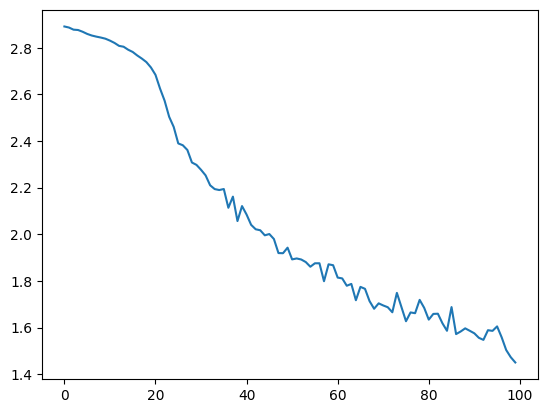

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

You are provided with a simple code that helps you to give the idea better. By modifying this code, you are able to demonstrate the mentioned disadvantages, but you are also free to change the code if needed or use any dataset you want.

**Question:** Do you think using GPU instead of CPU completely solves the first problem?
- Using a GPU instead of a CPU can significantly improve the performance of traditional RNNs by speeding up matrix operations and handling large datasets more efficiently, thanks to their parallel processing capabilities. However, GPUs do not completely solve the problem of slow recurrent computation inherent in RNNs. This is because RNNs process data sequentially, creating a dependency chain that cannot be fully parallelized, even on GPUs. While GPUs reduce computation time per step, they cannot parallelize across the steps themselves

Note: The main goal of this part is to help you understand these problems better. Don't be too hard to implement and delivery.

Epoch [10/100], Loss: 1.3412
Epoch [20/100], Loss: 1.2296
Epoch [30/100], Loss: 1.1344
Epoch [40/100], Loss: 1.0483
Epoch [50/100], Loss: 0.9662
Epoch [60/100], Loss: 0.8835
Epoch [70/100], Loss: 0.7939
Epoch [80/100], Loss: 0.6884
Epoch [90/100], Loss: 0.5580
Epoch [100/100], Loss: 0.4063


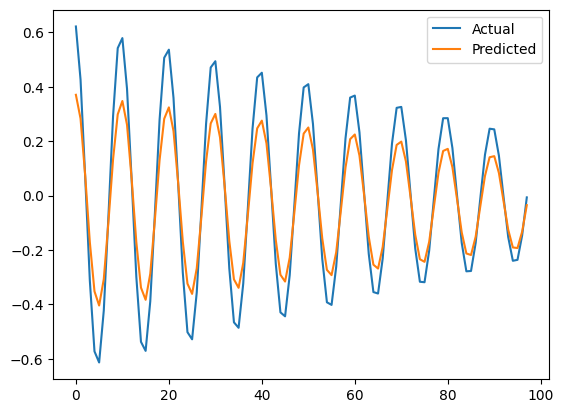

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

Now that you have experience with traditional RNNs, it's time to implement the LSTM model. Your goal is to implement the cell and model for LSTM architecture. The proposed dataset for this section is MNIST, allowing you to focus solely on model implementation.

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):

        # Inputs:
        #       input: (batch_size, input_size)
        #       hx: (batch_size, hidden_size)
        # Outputs:
        #       hy: (batch_size, hidden_size)
        #       cy: (batch_size, hidden_size)

        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size)).to(input.device)
            hx = (hx, hx)

        hx, cx = hx

        # your code
        gates = self.xh(input) + self.hh(hx)
        input_gate, forget_gate, cell_gate, output_gate = gates.chunk(4, 1)

        i_t = nn.functional.sigmoid(input_gate)
        f_t = nn.functional.sigmoid(forget_gate)
        g_t = nn.functional.sigmoid(cell_gate)
        o_t = nn.functional.sigmoid(output_gate)

        cy = cx * f_t + i_t * g_t
        hy = o_t * nn.functional.tanh(cy)

        return (hy, cy)

## LSTM Models

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)).to(x.device)
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)).to(x.device)

        cn = c0[0,:,:]
        hn = h0[0,:,:]
        outs = []

        for seq in range(x.size(1)):
            # your code
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)


        #your code
        out = outs[-1].squeeze()
        out = self.fc(out)

        return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  # ONLY 1 OR 2
output_dim = 10
# Number of steps to unroll
seq_dim = 28

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
model.to(device)

# your code
learning_rate = 1e-2
criterion =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# your code

# Train model and print Loss and Accuracy on Test Dataset after each 500 iterations

In [ ]:
best_val_loss = float('inf')
best_val_acc = 0

losses = []
iter = 1

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
      inputs = inputs.view(-1, seq_dim, input_dim).to(device)
      labels = labels.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)


      loss.backward()
      optimizer.step()

      # statistics
      running_loss += loss.item()

      iter += 1

      if iter%500 == 0:
        running_test_loss = 0.0
        running_test_acc = 0.0

        for j, (inputs, labels) in enumerate(test_loader):
          inputs = inputs.view(-1, seq_dim, input_dim).to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward
          with torch.set_grad_enabled(False):
            t_outputs = model(inputs)
            _, t_preds = torch.max(t_outputs, 1)
            t_loss = criterion(t_outputs, labels)

            # statistics
            running_test_loss += t_loss.item()
            running_test_acc += metrics.accuracy_score(labels.cpu(), t_preds.cpu())

        test_loss = running_test_loss / len(test_loader)
        test_acc = running_test_acc / len(test_loader)

        print(f'Iteration {iter} - '
          f'Test Loss: {test_loss:.4f} - '
          f'Test Accuracy: {test_acc:.4f}')


    train_loss = running_loss / len(train_loader)
    losses.append(train_loss)

Iteration 500 - Test Loss: 0.1801 - Test Accuracy: 0.9436
Iteration 1000 - Test Loss: 0.1165 - Test Accuracy: 0.9626
Iteration 1500 - Test Loss: 0.0815 - Test Accuracy: 0.9751
Iteration 2000 - Test Loss: 0.0719 - Test Accuracy: 0.9796
Iteration 2500 - Test Loss: 0.0648 - Test Accuracy: 0.9809
Iteration 3000 - Test Loss: 0.0636 - Test Accuracy: 0.9824
Iteration 3500 - Test Loss: 0.0646 - Test Accuracy: 0.9815
Iteration 4000 - Test Loss: 0.0641 - Test Accuracy: 0.9817
Iteration 4500 - Test Loss: 0.0589 - Test Accuracy: 0.9841
Iteration 5000 - Test Loss: 0.0623 - Test Accuracy: 0.9819
Iteration 5500 - Test Loss: 0.0518 - Test Accuracy: 0.9848


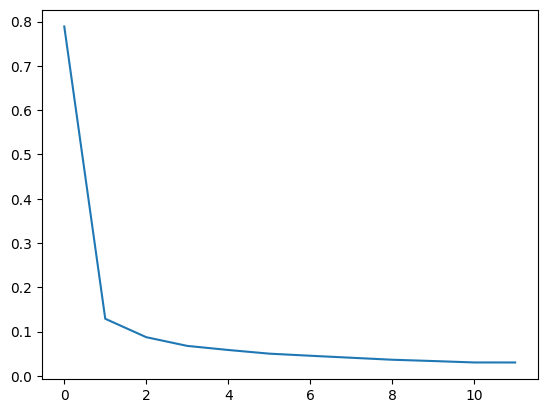

In [ ]:
plt.figure()
plt.plot(losses)

# Sentiment Analysis

Now you are ready to face a real-world problem. In this task, we want you to do a sentiment analysis on the [IMDB dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The main goal is to reach more than an acceptable accuracy of **75%** on LSTM model. You are free to use torch.nn.LSTM to design your architecture, but you must prepare the IMDB dataset on your own.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchtext import data
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/AI/Deep Learning/DL/HW3/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [30]:
#sentiment count
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [35]:
from collections import Counter
import re

def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    encoded_train = [1 if label =='positive' else 0 for label in y_train]
    encoded_test = [1 if label =='positive' else 0 for label in y_val]
    return final_list_train, encoded_train, final_list_test, encoded_test, onehot_dict



In [36]:
X = np.array(imdb_data['review'])
y = np.array(imdb_data['sentiment'])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [38]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)

In [39]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [40]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features



#we have very less number of reviews with length > 500.
#So we will consideronly those below it.
x_train_pad = torch.tensor(padding_(x_train,100))
x_test_pad = torch.tensor(padding_(x_test,100))

In [41]:
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [42]:
x_train_pad, x_val_pad, y_train, y_val = train_test_split(x_train_pad, y_train, test_size=0.2)
x_train_pad.shape, x_val_pad.shape

(torch.Size([32000, 100]), torch.Size([8000, 100]))

In [43]:
# create Tensor datasets
train_data = TensorDataset(x_train_pad, y_train)
valid_data = TensorDataset(x_val_pad, y_val)
test_data = TensorDataset(x_test_pad, y_test)

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
dataloaders = {}

dataloaders['train'] = DataLoader(train_data, shuffle=True, batch_size=batch_size)
dataloaders['val'] = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
dataloaders['test'] = DataLoader(train_data, shuffle=True, batch_size=batch_size)

In [44]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,  x):
        batch_size = x.size(0)
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)

        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True

        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


In [45]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [67]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [68]:
# loss and optimization functions
lr=1e-3

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [76]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()

    for inputs, labels in dataloaders['train']:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history

        model.zero_grad()
        output,h = model(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()


    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in dataloaders['val']:

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)

    epoch_train_acc = train_acc/len(dataloaders['train'].dataset)
    epoch_val_acc = val_acc/len(dataloaders['val'].dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss:.4} val_loss : {epoch_val_loss:.4}')
    print(f'train_accuracy : {epoch_train_acc*100:.4} val_accuracy : {epoch_val_acc*100:.4}')
    print(25*'==')

Epoch 1
train_loss : 0.5419 val_loss : 0.4995
train_accuracy : 72.34 val_accuracy : 76.79
Epoch 2
train_loss : 0.3994 val_loss : 0.3906
train_accuracy : 82.19 val_accuracy : 83.39
Epoch 3
train_loss : 0.3598 val_loss : 0.3719
train_accuracy : 84.67 val_accuracy : 83.55
Epoch 4
train_loss : 0.335 val_loss : 0.3469
train_accuracy : 85.79 val_accuracy : 84.52
Epoch 5
train_loss : 0.304 val_loss : 0.3548
train_accuracy : 87.31 val_accuracy : 84.14


In [77]:
def show_plots(num_epochs, train_data, val_data, metric):
  e = np.arange(num_epochs)
  plt.plot(e, train_data, label='Train '+metric)
  plt.plot(e, val_data, label='Validation '+metric)
  plt.xlabel('epoch')
  plt.ylabel(metric)
  plt.legend()

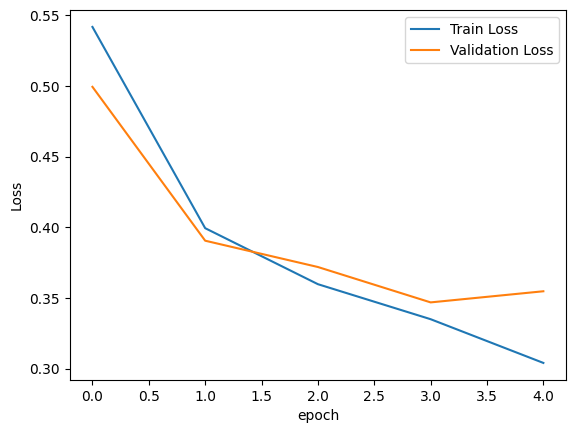

In [78]:
show_plots(epochs, epoch_tr_loss, epoch_vl_loss, 'Loss')

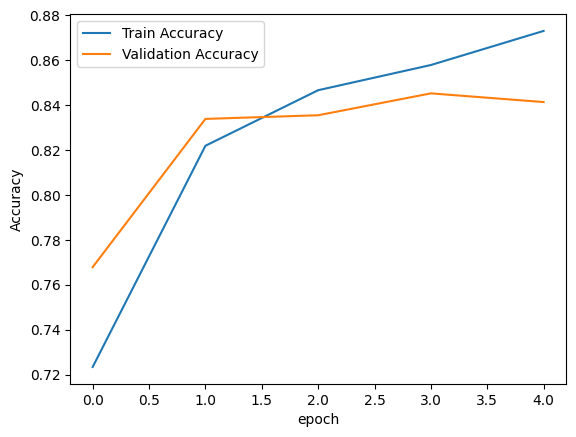

In [79]:
show_plots(epochs, epoch_tr_acc, epoch_vl_acc, 'Accuracy')

In [80]:
test_losses = []
test_acc = 0.0
model.eval()
for inputs, labels in dataloaders['test']:

        inputs, labels = inputs.to(device), labels.to(device)

        output, val_h = model(inputs)
        test_loss = criterion(output.squeeze(), labels.float())

        test_losses.append(val_loss.item())

        accuracy = acc(output,labels)
        test_acc += accuracy

total_test_loss = np.mean(test_losses)

total_train_acc = train_acc/len(dataloaders['test'].dataset)

print(f'test_loss : {total_test_loss} test_accuracy : {total_train_acc*100}')

test_loss : 0.35119199752807617 test_accuracy : 87.30624999999999


In [81]:
import sklearn
def plot_confusionmatrix(y_pred, y_true, classes):
  print('Confusion matrix')
  cf = sklearn.metrics.confusion_matrix(y_pred, y_true, labels=np.arange(len(classes)))
  sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

Confusion matrix


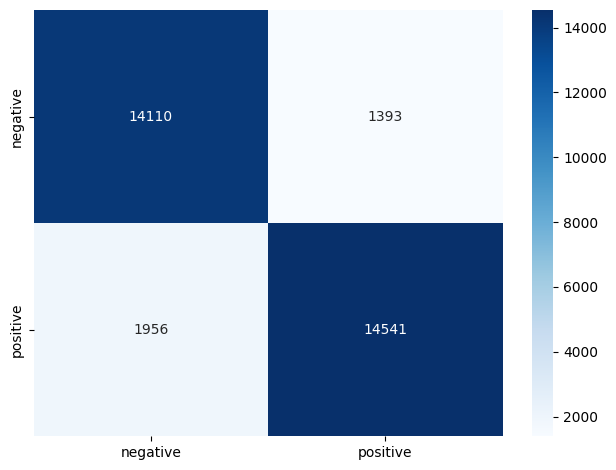

In [82]:
classes = ['negative', 'positive']

def report(model, loader, device, classes):

  # Each epoch has a training and validation phase
  model.eval()   # Set model to evaluate mode

  y_pred = []
  y_true = []

  # Iterate over data.
  for inputs, labels in loader:
    inputs = inputs.to(device)
    labels = labels.type(torch.LongTensor)

    # forward
    # track history if only in train
    with torch.set_grad_enabled(False):
      outputs, _ = model(inputs)
      pred = torch.round(outputs.squeeze())
      y_pred.extend(pred.cpu())
      y_true.extend(labels.squeeze())

  plot_confusionmatrix(y_pred, y_true, classes)

report(model, dataloaders['test'], device, classes)

## References

- [kaggle](https://www.kaggle.com/code/arunmohan003/sentiment-analysis-using-lstm-pytorch)